In this notebook, using two different examples, the Auto Regressive Cepstral Coefficients and Real Cepstral Coefficients **are compared** regarding their discriminatory power in grasping the inner patterns of time series.  
In terms of reliable examinations, similar time windows are found using `stumpy` package. The package is prominent in time series pattern matching domain and can be reffered as a reference. After finding the similar time windows using `stumpy`, I examine the eligibility of cepstral coefficients regarding their ability to discern the underlying patterns of time series. The procedure is as follows:  
1. Find similar pair of time windows using `stumpy`
2. Calculate the cepstral coefficients of two similar time windows (cc1 and cc2) and an unsimilar one (cc3).
3. Calculate the Euclidean distance between each pair of calculated cepstral coefficients (i.e., Euclidean distance between (cc1 and cc3), (cc2, cc3), and (cc1, cc2). Presuming the valid efficiency of cepstral coefficients, I expect $euclidean(cc1, cc2)<euclidean(cc2, cc3)$ and $euclidean(cc1, cc2)<euclidean(cc1, cc3)$).

Two different methods for calculating cepstral coefficients are provided here
- Auto Regressive Cepstral Coefficients (ARCepstral)
- Real Cepstral Coefficients

# ARCepstral
The cepstrum of an ARIMA time–series can be estimated using the parameters of an ARIMA model for that time–series. Consider a time–series $X_t$ defined by an $AR(p)$ model $X_t+\alpha_1X_{t-1}+\ldots+\alpha_pX_{t-p}=\epsilon_t$ where $\alpha_1+\ldots+\alpha_p$ are the auto-regression coefficients and $\epsilon_t$ is white noise with mean 0 and certain non zero variance. Note that for every ARIMA model there exists an equivalent AR model, that can be obtained from the ARIMA model by polynomial division. Hence, without loss of generality, for the remainder of this paper we focus on AR time–series.  
The cepstral coefficients for an $AR(p)$ time–series can be derived from the auto-regression coefficients [[1](https://scholar.google.com/scholar?hl=en&as_sdt=0%2C5&q=S.+Furui.+Digital+Speech+Processing%2C+Synthesis%2C+and+Recognition.+Marcel+Deckker%2C+Inc.%2C+New+York%2C+1989.&btnG=)]:
$$
{c_n} = \left\{ {\begin{array}{*{20}{c}}
  { - {\alpha _1},}&{{\text{if n = 1}}} \\ 
  { - {\alpha _n} - \sum\nolimits_{m = 1}^{n - 1} {\left( {1 - \frac{m}{n}} \right){\alpha _m}{c_{n - m}},} }&{{\text{if }}1 < n \leqslant p} \\ 
  { - \sum\nolimits_{m = 1}^p {\left( {1 - \frac{m}{n}} \right){\alpha _m}{c_{n - m}},} }&{{\text{if }}p < n} 
\end{array}} \right.
$$

# Real Cepstral
The real cepstrum is defined as the inverse Fourier transform of the real logarithm of the Fourier transform of the time series [[2](https://doi.org/10.1016/j.eswa.2020.113705
)]. 


# Import the required packages

In [1]:
using PythonCall
using YFinance
stumpy = pyimport("stumpy")
plt = pyimport("matplotlib.pyplot")
np = pyimport("numpy")
include("../src/CepstralClustering.jl")
using .CepstralClustering
import PythonPlot as pl

# Find similar Time windows using `stumpy`
The daily adjusted close price of the Intel Corporation from 19th, October 2018 to 17th, March 2020 are fetched using the `YFinance.jl` package. The time series passed to the `stumpy` package in order to find pairs of similar time windows.

In [7]:
series = get_prices("INTC", startdt="2018-10-19", enddt="2020-03-17")["adjclose"];
prof = stumpy.stump(series, 100)
p = pyconvert(Array, prof);

# 1st example

In [3]:
motif_idx = sortperm(p[:, 1])[100]
@info motif_idx
pair = pyconvert(Integer, p[motif_idx, 2])
@info pair

[ Info: 250
[ Info: 42


According to the result of the above cell, the 250th window is similar with the 42th window. 

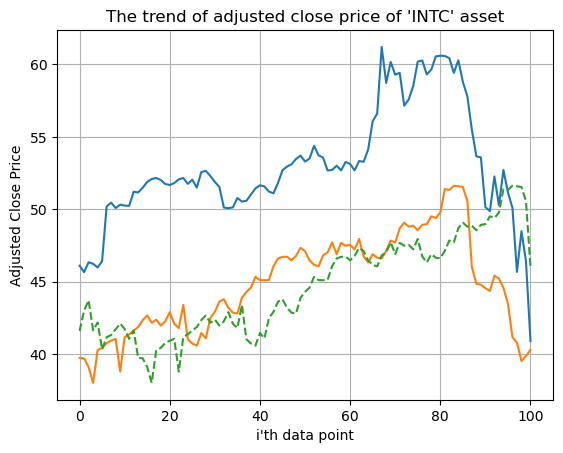

In [8]:
pl.plot(series[250:250+100])
pl.plot(series[42:42+100])
pl.plot(series[29:29+100], linestyle="--")
pl.xlabel("i'th data point")
pl.ylabel("Adjusted Close Price")
pl.title("The trend of adjusted close price of 'INTC' asset")
pl.grid()
pl.show()

## ARCepstral

In [101]:
cc1 = cc(ARCepstral, series[250:250+100], 1, 5)
cc2 = cc(ARCepstral, series[42:42+100], 1, 5)
euc(v1, v2) = (v1.-v2).^2 |> sum |> sqrt
euc(cc1, cc2)

0.023241655518685397

In [103]:
cc3 = cc(ARCepstral, series[29:29+100], 1, 5)
@info euc(cc1, cc3)
@info euc(cc2, cc3)

[ Info: 0.026538722878048298
[ Info: 0.003297191931426521


## Real Cepstral

In [106]:
cc1 = cc(RealCepstral, series[250:250+100], 5, 5)
cc2 = cc(RealCepstral, series[42:42+100], 5, 5)
cc3 = cc(RealCepstral, series[29:29+100], 5, 5)
@info euc(cc1, cc2)
@info euc(cc1, cc3)
@info euc(cc2, cc3)

[ Info: 0.10794004625165242
[ Info: 0.3607796202821378
[ Info: 0.38478378343114067


# 2nd example

In [9]:
motif_idx = sortperm(p[:, 1])[75]
@info motif_idx
pair = pyconvert(Integer, p[motif_idx, 2])
@info pair

[ Info: 228
[ Info: 28


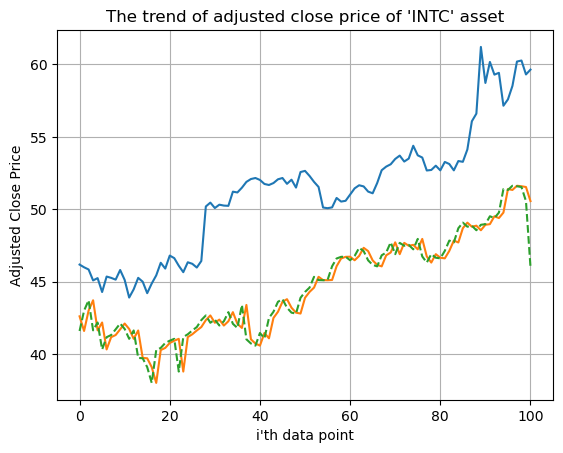

In [12]:
import PythonPlot as pl
pl.plot(series[motif_idx:motif_idx+100])
pl.plot(series[pair:pair+100])
pl.plot(series[29:29+100], linestyle="--")
pl.xlabel("i'th data point")
pl.ylabel("Adjusted Close Price")
pl.title("The trend of adjusted close price of 'INTC' asset")
pl.grid()
pl.show()

As can be seen from the figure above, the red and green lines are somewhat mirroring each other. Thus, expectedly, their cepstral coefficients must have a lower distance with each other compared to the distance from the cepstral coefficients of the blue line.

## ARCepstral

In [128]:
cc1 = cc(ARCepstral, series[29:29+100], 1, 5)
cc2 = cc(ARCepstral, series[pair:pair+100], 1, 5)
euc(v1, v2) = (v1.-v2).^2 |> sum |> sqrt
euc(cc1, cc2)

0.053452445880853496

In [129]:
cc3 = cc(ARCepstral, series[motif_idx:motif_idx+100], 1, 5)
@info euc(cc1, cc3)
@info euc(cc2, cc3)

[ Info: 0.06631114930082688
[ Info: 0.012861282268291377


## RealCepstral

In [130]:
cc1 = cc(RealCepstral, series[29:29+100], 5, 5)
cc2 = cc(RealCepstral, series[pair:pair+100], 5, 5)
cc3 = cc(RealCepstral, series[motif_idx:motif_idx+100], 5, 5)
@info euc(cc1, cc2)
@info euc(cc1, cc3)
@info euc(cc2, cc3)

[ Info: 0.1802611563487017
[ Info: 0.38730622492319106
[ Info: 0.5386602040233419


# Conclusion
According to the results, the Real Cepstral method performs better in presenting the inner patterns of time series through several coefficients.